<center><h1>Análise Exploratória de Dados com Python e Pandas</h1></center>
<center><h3>Demonstração com o dataset *Titanic: Machine Learning from Disaster* (kaggle.com)</h3><center>

![title](static/youtube.jpg)
<center>Figura 1: TITANIC sinking. Extraída de https://youtu.be/9xoqXVjBEF8</center>

<h2 style="color:#4682B4">Análise Exploratória de Dados (AED) ou Exploratory data analysis(EDA)</h2>

Objetivos:
<ul>
<li>Examinar dados previamente à aplicação de qualquer técnica.</li>
<li>Realizar uma análise descritiva dos dados, de modo a se ter um entendimento básico dos dados e das relalações existentes entre as variáveis analisadas</li>
</ul>

<h3 style="color:#4682B4">Etapas da AED:</h3>
<ul>
<li>Preparação dos Dados para serem acessíveis a qualquer técnica</li>
<li>Exame Gráfico da natureza das Variáveis Individuais</li>
<li>Exame Gráfico das relações entre as variáveis analisadas</li>
<li>Identificar possíveis atípicos / anomalias / *outliers*</li>
<li>Verificar se existem dados ausentes (*missing*)</li>
<li> Verificar suposições sobre os dados, como normalidade, linearidade, etc.</li>
</ul>

![title](static/kagglettnc.jpg)
<center>Figura 1: Dataset Titanic. Disponível em https://www.kaggle.com/c/titanic/data</center>

- Conjuntos de Dados:
    - Treinamento: 891 exemplos rotulados
    - Teste: 418 exemplos não rotulados

    
- Atributos:
    - **Survival**
    - **Pclass**: Categoria do Ticket. Uma representação para o *status* socio-econômico. 1st - Upper, 2nd - Middle, 3rd - Lower
    - **Sex**: Sexo.
    - **Age**: Idade em anos.
    - **Sibsp**: # número de irmãos / cônjuges a bordo.
    * **Parch**: # de parentes / crianças a bordo.
    - **Ticket**: Número do Ticket.
    - **Fare**: Tarifa de passageiros.
    - **Cabin**: Número da cabine.
    - **Embarked**: Porto de embarcação - C = Cherbourg, Q = Queenstown, S = Southampton

## Demonstração com Pandas

In [95]:
### Módulos necessários
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

### I Analisar os Dados de Treinamento

#### A. Explorar os dados
- Verificar o tipo de dados de cada coluna (variável categórica, numérica, etc.)
- Observar min/max/média dos valores

In [96]:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [97]:
# Arquivos disponíveis em https://www.kaggle.com/c/titanic/data

# DataFrame com o conjunto de treinamento
train = pd.read_csv('data/train.csv')

# Dataframe com o conjunto de teste
test = pd.read_csv('data/test.csv')

In [98]:
# DataFrame: Uma coleção de Séries, onde cada série pode ter um tipo diferente.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
# dimensões da matriz
rows, columns = train.shape

rows, columns

(891, 12)

In [100]:
# Quantidade de exemplos em cada classe - Survived: 0 ou 1
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [101]:
# Esta é uma variável contínua
train.Fare.value_counts().head(10)

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
10.5000    24
7.9250     18
7.7750     16
26.5500    15
0.0000     15
Name: Fare, dtype: int64

In [102]:
# estatísticas sobre esta coluna
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [103]:
# Correlação entre as variáveis
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### B. Verificar se há valores nulos nas Colunas

In [104]:
# Colunas (Features)# Colunas 
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [105]:
# valores nulos para o atributo Sex ?
train.Sex.isnull().sum()

0

In [106]:
# valores nulos para o atributo PClass ?
train.Pclass.isnull().sum()

0

In [107]:
# valores nulos para o atributo Fare ?
train.Fare.isnull().sum()

0

In [108]:
# valores nulos para o atributo Age ?
# há 177 linhas com valores NaN para a coluna 'Age'
train.Age.isnull().sum()

177

In [109]:
# Observe que Sex é um atributo categórico
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

#### C Preencher valores Faltantes

In [110]:
# preenche valores Age NaN com a mediana de idade
train.Age = train.Age.fillna(train.Age.median()) # preenche valores NaN

train.Age.isnull().sum()

0

#### D. Realizar Consultas para obter Insights Úteis a partir dos Dados

In [111]:
# filtrando os dados ..
train[ train.Sex == 'female'].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [112]:
# Não há campos nulos nesta coluna
train [train.Sex.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [113]:
train[train.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#### E. Transformar Dados Categóricos em Dados Numéricos

In [114]:
# transformar dados categóricos em numéricos
dummies = pd.get_dummies(train.Sex)
train['Female'] = dummies.female
train['Male'] = dummies.male

#### F. Visualizar Dados
- alguma informação sobre a distribuição dos dados ?

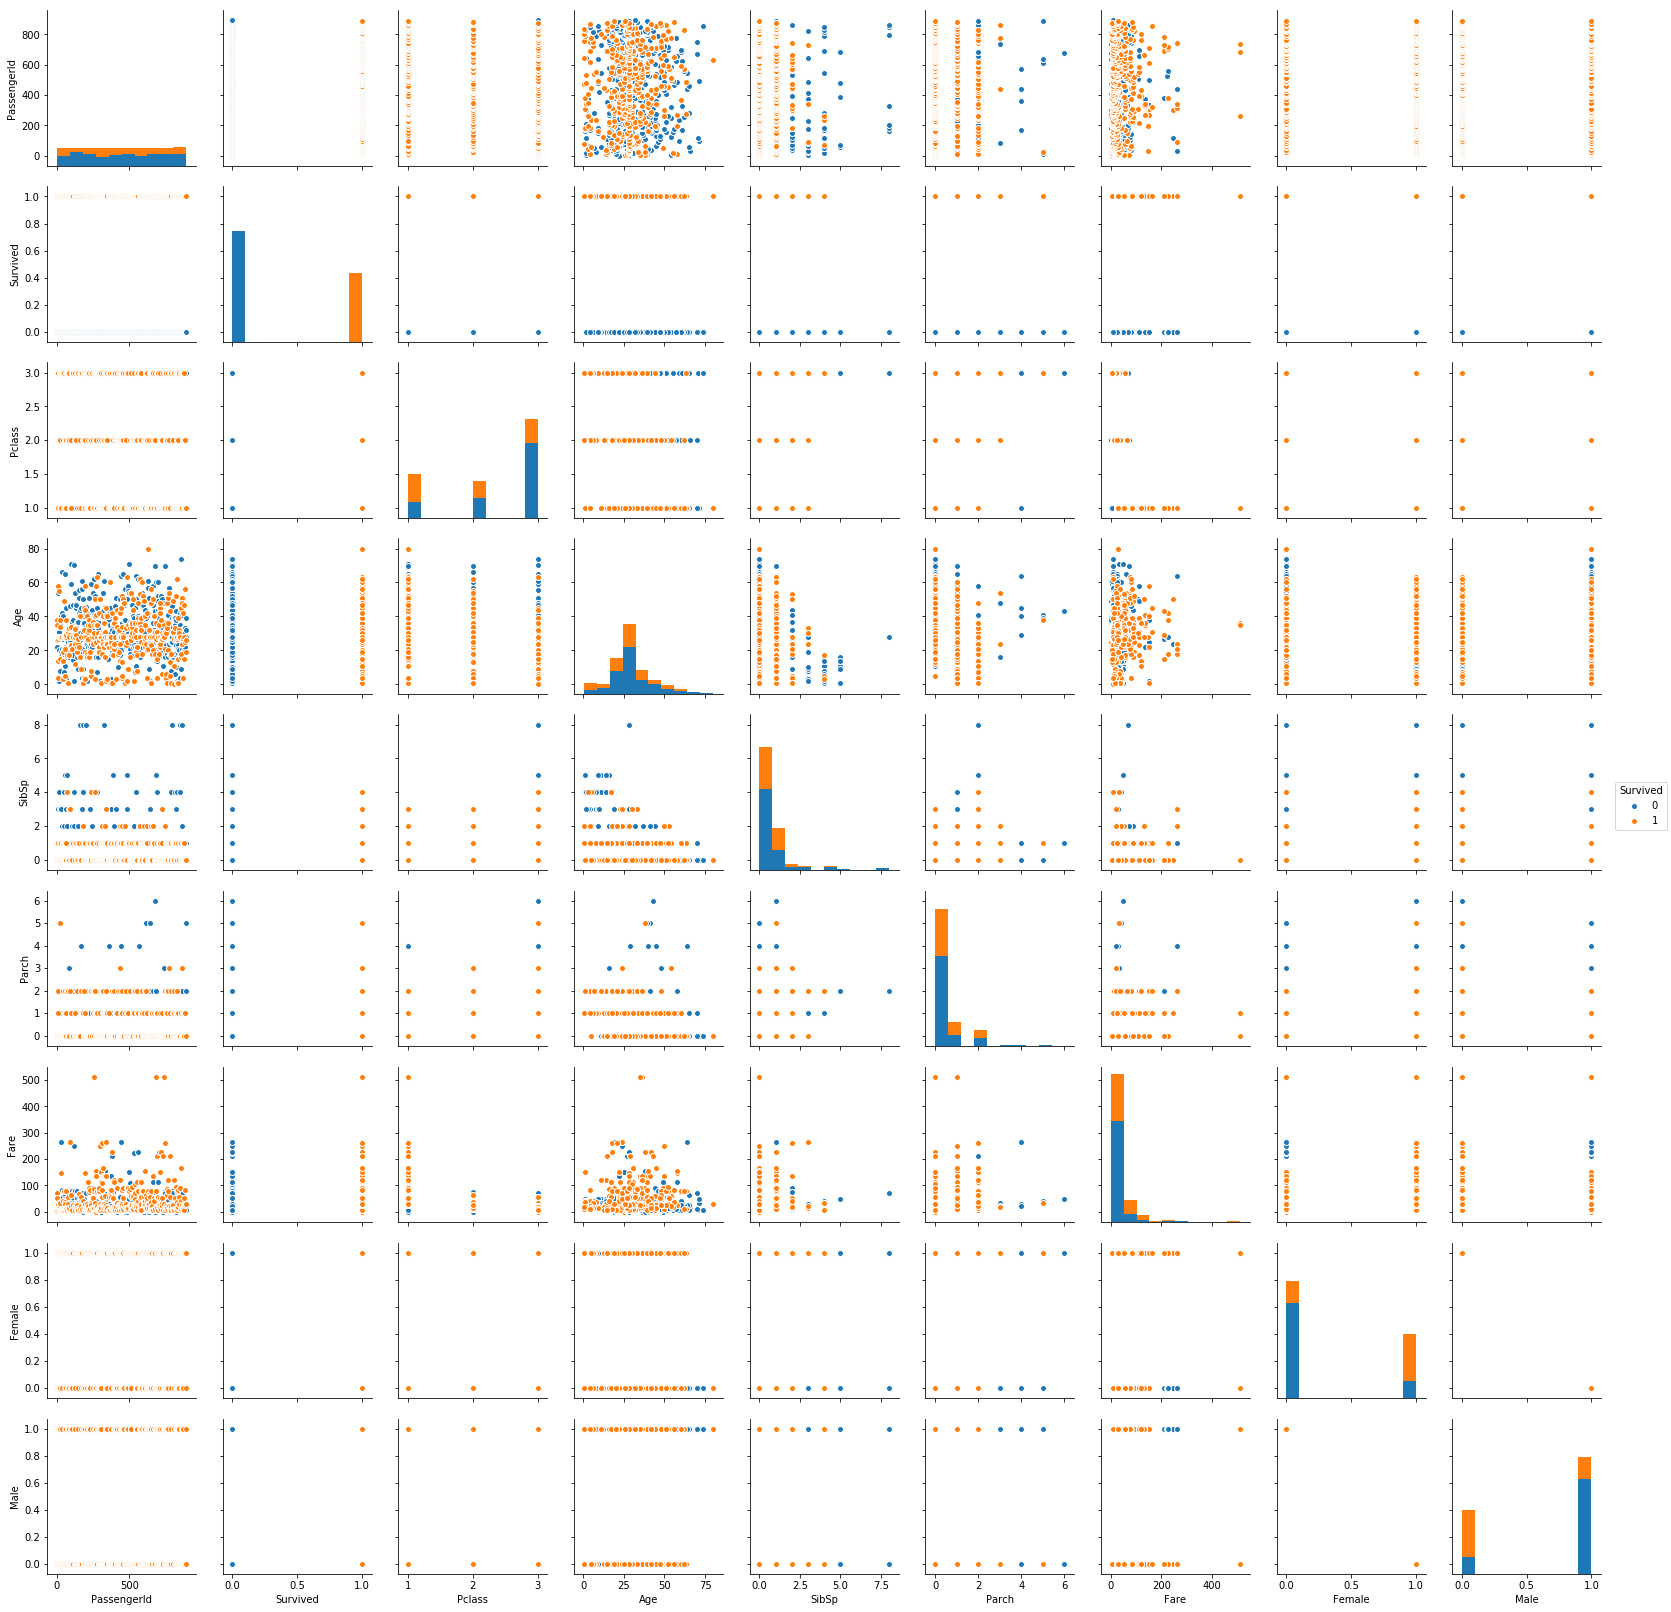

In [115]:
import seaborn as sb
sb.pairplot(train, hue = 'Survived')

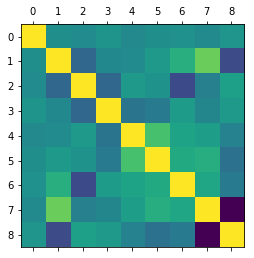

In [116]:
# Correlação entre as variáveis
plt.matshow(train.corr())

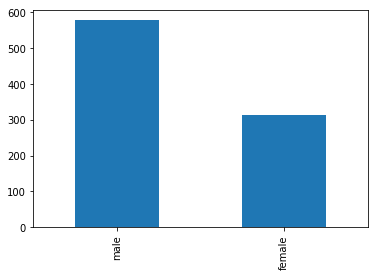

In [117]:
# Plote esta série de dados
train.Sex.value_counts().plot(kind='bar')

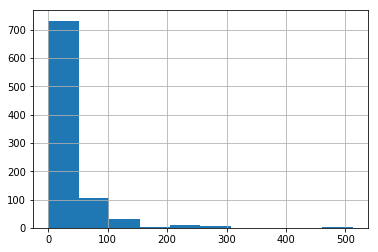

In [118]:
# Histograma desta coluna
train.Fare.hist()

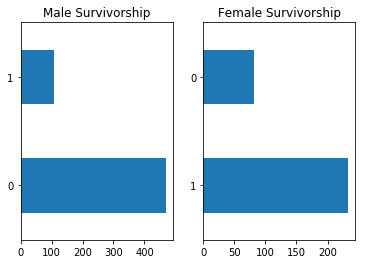

In [119]:
# sobreviventes# sobrevi 
fig, axis = plt.subplots(1,2)
train[train.Sex=='male'].Survived.value_counts().plot(kind='barh', title='Male Survivorship', ax=axis[0])
train[train.Sex=='female'].Survived.value_counts().plot(kind='barh',  title='Female Survivorship', ax=axis[1])

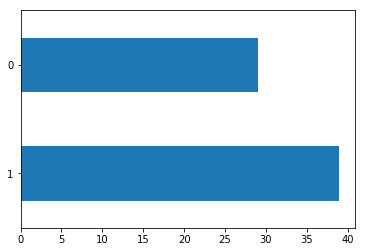

In [120]:
# Crianças
train[ train.Age < 12 ].Survived.value_counts().plot(kind='barh')

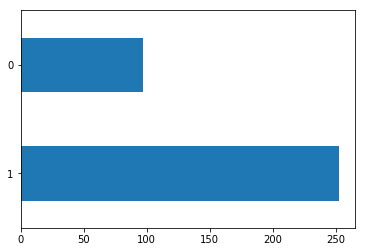

In [121]:
# mulheres e crianças
train[ (train.Age < 12) | (train.Sex=='female') ].Survived.value_counts().plot(kind='barh')

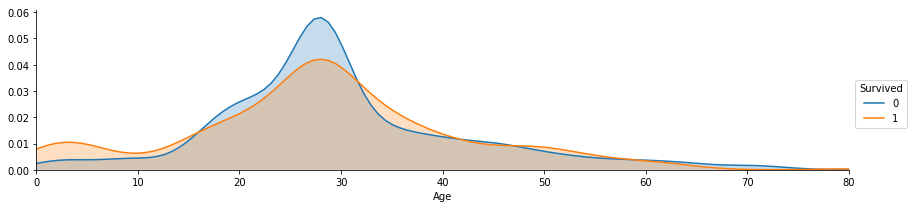

In [122]:
# Classe vs Idade
import seaborn as sb
facet = sb.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sb.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train.Age.max()))
facet.add_legend()

## II Analisar os Dados de Teste

### Verificar se há valores nulos nas Colunas

In [123]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [125]:
# valores nulos para o atributo Sex ?
test.Sex.isnull().sum()

0

In [126]:
# valores nulos para o atributo Age ?# valores 
test.Fare.isnull().sum()

1

In [127]:
# valores nulos para o atributo Cabin ?
test.Cabin.isnull().sum()

327

In [129]:
# valores nulos para o atributo Fare ?# valores 
test.Fare.isnull().sum()

1

### Preencher valores Faltantes

In [130]:
# Localizar linhas com valores nulos ...
test [test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [131]:
# altera valor
test.loc[test.PassengerId==1044, 'Fare'] = train[train.Sex=='male'].Fare.mean()

####  Transformar Dados Categóricos em Dados Numéricos

In [132]:
# transformar dados categóricos em numéricos
dummies = pd.get_dummies(test.Sex)
test['Female'] = dummies.female
test['Male'] = dummies.male
test = test.drop('Sex', axis=1)
test.head(3)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,1


In [133]:
# Conjunto de teste
X_test = test[[ 'PassengerId', 'Fare', 'Male', 'Female']].values

In [135]:
X_test

array([[8.92000e+02, 7.82920e+00, 1.00000e+00, 0.00000e+00],
       [8.93000e+02, 7.00000e+00, 0.00000e+00, 1.00000e+00],
       [8.94000e+02, 9.68750e+00, 1.00000e+00, 0.00000e+00],
       ...,
       [1.30700e+03, 7.25000e+00, 1.00000e+00, 0.00000e+00],
       [1.30800e+03, 8.05000e+00, 1.00000e+00, 0.00000e+00],
       [1.30900e+03, 2.23583e+01, 1.00000e+00, 0.00000e+00]])

## III C Classificação Supervisionada com Sklearn

In [137]:
# Exemplos para o Conjunto de Treinamento
X = train[[ 'Fare', 'Male', 'Female']].values

# Classe de cada exemplo de treinamento
y = train['Survived'].values

In [138]:
# Classificação supervisionada com skLearn# Classif 
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
model = classifier.fit(X, y)

In [139]:
predictions = model.predict(X_test[:, 1:])
passengers = test.PassengerId

In [140]:
file = open('submission.csv', 'w')
file.write('PassengerId,Survived\n')
for prediction, passenger  in zip(predictions, passengers):
    file.write('{},{}\n'.format(passenger, prediction))
file.close()

In [141]:
print('done!')

done!


Links úteis
- **Pandas: powerful Python data analysis toolkit**. Disponível em http://pandas.pydata.org/pandas-docs/stable/
- **Jupyter**. Disponível em http://jupyter.org/
- **Anaconda: The Most Popular Python Data Science Platform**. Disponível em https://www.anaconda.com/what-is-anaconda/